<a href="https://colab.research.google.com/github/anissval/colabs-data-analytics-/blob/main/modulo11/Trabajo_Final_Modulo_11_Valdiviezo_Anahi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

# **Trabajo Final - Módulo 11 - Aprendizaje Automático - Machine Learning - Clustering**

![logo](https://www.python.org/static/community_logos/python-powered-w-100x40.png)

~~~
Valdiviezo Anahi
~~~

**Instrucciones**

El conjunto de datos contiene información sobre los clientes de un centro comercial. Se desea utilziar un modelo de Agrupación para crear clusters y tomar una decisión comercial con cada grupo de clientes que ayude a mejorar la relación con el cliente y el monto de dinero que gastan en el centro comercial.

- Desarrollar los puntos necesarios para generar el modelo de Agrupación.
- Puede generar graficos en cualquier instancia del desarrollo.
- Al final del colab, generar una breve conclusión sobre decisiones a tomar con cada cluster.

# **Carga de módulos y datos necesarios**

# **Instalando Pycaret**

In [1]:
!pip install --pre pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np

In [3]:
from pycaret.clustering import *

In [4]:
import plotly.express as px
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns


# **Creación del DataFrame**

In [6]:
datos = "https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Modulo_11_Agrupacion/Mall_Customers.csv"
clientes_df = pd.read_csv(datos)
clientes_df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


- CustomerID - ID de cliente
- Gender - Genero
- Age - Edad
- AnualIncome - Ingreso Anual
- SpendingScore - Score de gasto en el mall

In [7]:
clientes_df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Limpieza**

In [8]:
clientes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   AnnualIncome   200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Eliminamos las variables que no son relavantes para este problema

In [9]:
clientes_df = clientes_df.drop(columns=["CustomerID","Gender"])
clientes_df.head(5) 

,Age,AnnualIncome,SpendingScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [10]:
clientes_df.shape

(200, 3)

In [11]:
clientes_df.columns

Index(['Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

In [12]:
clientes_df.head()

,Age,AnnualIncome,SpendingScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [13]:
nombres_columnas = ["Edad", "IngresoAnual", "ScoreGastoMall"]

In [14]:
clientes_df.columns = nombres_columnas

In [15]:
clientes_df.head()

,Edad,IngresoAnual,ScoreGastoMall
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [16]:
clientes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Edad            200 non-null    int64
 1   IngresoAnual    200 non-null    int64
 2   ScoreGastoMall  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


**EDA**

In [43]:
px.histogram(clientes_df, x = clientes_df.Edad, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])

In [44]:
px.histogram(clientes_df, x = clientes_df.IngresoAnual, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])

In [45]:
px.histogram(clientes_df, x = clientes_df.ScoreGastoMall, marginal="box", template = "gridon",color_discrete_sequence = ['lightseagreen'])

##**Dividiendo el conjunto de datos**

In [20]:
clientes_entrenamiento = clientes_df.sample(frac = 0.75, random_state=0)
clientes_no_vistos = clientes_df.drop(clientes_entrenamiento.index)

In [21]:
clientes_entrenamiento .reset_index(inplace=True, drop=True)
clientes_no_vistos.reset_index(inplace=True, drop=True)

In [22]:
print("Datos para Modelar: " + str(clientes_entrenamiento .shape))
print("Datos no vistos para Predicciones: " + str(clientes_no_vistos.shape))

Datos para Modelar: (150, 3)
Datos no vistos para Predicciones: (50, 3)


In [23]:
clientes_entrenamiento.head()

,Edad,IngresoAnual,ScoreGastoMall
0,52,23,29
1,40,87,13
2,54,63,46
3,48,61,42
4,27,88,69


In [24]:
clientes_no_vistos.head()

,Edad,IngresoAnual,ScoreGastoMall
0,30,19,72
1,20,21,66
2,25,24,73
3,29,28,82
4,40,29,31


# **Configuracion Pycaret**

In [51]:
agrupacion = setup(clientes_entrenamiento, session_id = 123, normalize = True,pca_components=3)

,Description,Value
0,Session id,123
1,Original data shape,"(150, 3)"
2,Transformed data shape,"(150, 3)"
3,Numeric features,3
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,constant
8,Low variance threshold,0
9,Normalize,True


# **Generación del modelo de agrupación**

In [52]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [53]:
print(f"Hay {len(models())} algoritmos para clustering")

Hay 9 algoritmos para clustering


## **Algoritmo Hierarchical Clustering**


In [54]:
hierarchicalModel = create_model('hclust', num_clusters=5)
print(hierarchicalModel)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4038,83.2785,0.9579,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

AgglomerativeClustering(n_clusters=5)


# **Asignando el Modelo**

Ahora que hemos creado un modelo, nos gustaría asignar las etiquetas de grupo a nuestro conjunto de datos ( **150  muestras**) para analizar los resultados. Lo lograremos usando la función assign_model().

In [55]:
hierarchicalModel_resultados = assign_model(hierarchicalModel)
hierarchicalModel_resultados.head(10)

,Edad,IngresoAnual,ScoreGastoMall,Cluster
0,52,23,29,Cluster 1
1,40,87,13,Cluster 2
2,54,63,46,Cluster 1
3,48,61,42,Cluster 1
4,27,88,69,Cluster 3
5,46,98,15,Cluster 2
6,22,17,76,Cluster 0
7,48,77,36,Cluster 2
8,58,20,15,Cluster 4
9,44,78,20,Cluster 2


In [56]:
hierarchicalModel_resultados.shape

(150, 4)

# **Evaluación del Modelo**

In [57]:
evaluate_model(hierarchicalModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Visualización del Modelo**

In [58]:
plot_model(hierarchicalModel)

In [59]:
plot_model(hierarchicalModel, plot = 'tsne' )


## **Visualización del Codo**

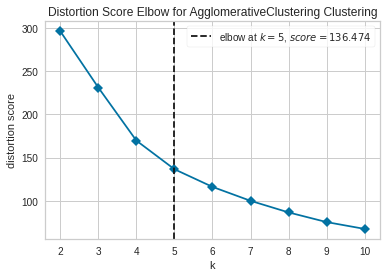

In [60]:
plot_model(hierarchicalModel, plot = 'elbow')

## **Visualización de la Distribución**


La gráfica de distribución muestra el tamaño de cada grupo. Al pasar el cursor sobre las barras, verá el número de muestras asignadas a cada grupo. En el ejemplo anterior, podemos observar que el grupo 0 tiene el mayor número de muestras. También podemos usar la gráfica de distribución para ver la distribución de etiquetas de clusters en asociación con cualquier otra característica numérica o categórica.

In [61]:
plot_model(hierarchicalModel, plot = 'distribution')

In [62]:
plot_model(hierarchicalModel, plot = 'distribution', feature = 'Edad')

In [63]:
plot_model(hierarchicalModel, plot = 'distribution', feature = 'IngresoAnual')

In [64]:
plot_model(hierarchicalModel, plot = 'distribution', feature = 'ScoreGastoMall')

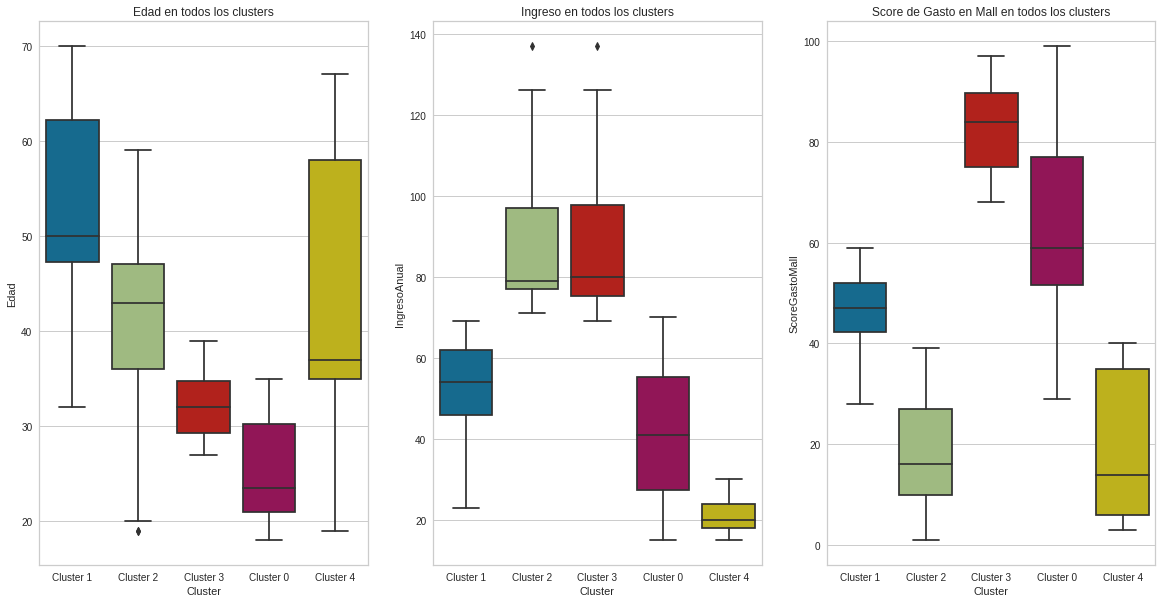

In [65]:

#Bloxplots para comparar edad, ingreso y score de gasto en el mall de cada cluster
fig, axes = plt.subplots(1, 3, figsize=(20,10))
ax = sns.boxplot(ax=axes[0], x="Cluster", y="Edad", data=hierarchicalModel_resultados)
ax.title.set_text('Edad en todos los clusters')
ax2 = sns.boxplot(ax=axes[1], x="Cluster", y="IngresoAnual", data=hierarchicalModel_resultados)
ax2.title.set_text('Ingreso en todos los clusters')
ax3 = sns.boxplot(ax=axes[2], x="Cluster", y="ScoreGastoMall", data=hierarchicalModel_resultados)
ax3.title.set_text('Score de Gasto en Mall en todos los clusters')
plt.show()

# **Conclusiones**

De los clusters obtenidos y los graficos descriptivos podemos concluir que existen 5 grupos de clientes para los cuales podriamos generar diferentes campañas.

**Top 5 clientes** basados en el score de gastos en el mall

1.   Cluster 3 (30 personas - 20%)
2.   Cluster 0 (36 personas - 24%)
3.   Cluster 1 (46 personas - 30%)
4.   Cluster 2 (25 personas - 17%)
5.   Cluster 4 (13 personas - 9%)

Tamaño de nuestra muestra : 150

Basandome en la informacion recopilada sobre los clusters me parece razonable centrarnos mas en el cluster que evalua el score de gastos en el mall y no por ejemplo en el de edades ya que si bien podriamos basarnos en la media de edades, al hacer esto quedaria mucha gente mal categorizada para las ofertas segun sus score de gastos, basta comparar el cluster 0 y 2 para darnos cuenta de esto.

El cluster 3, nuestro mejores clientes, los que tienen los score de gastos mas altos en el mall, su gasto condice con su nivel de ingreso alto. Sabemos que estas personas tienen poder adquisitivo por lo cual podriamos enviarles descuentos mas frecuentes para seguir motivando el gasto en nuestro mall. Al mismo tiempo podemos destacar que son personas entre 27 y 37 años. Seria bueno tener informacion acerca de su composicion familiar para asi poder enfocar mas las campañas y dividir entre personas con hijos y sin hijos.

El cluster 0, se destaca que son nuestros clientes mas jovenes entre 20 y 30 años con ingreso de nivel medio, son nuestros segundos mejor consumidores.

El cluster 1, es nuestro grupo de mayor edad entre nuestros clientes, su ingreso es medio y son nuestro tercer mejores compradores. Representan el grupo de mayor porcentaje dentro de nuestra muestra, tienen un ingreso medio que concuerda con su score en gastos del mall. Al ser el cluster mas grande entre nuestros clientes, me parece importante obtener mas informacion sobre sus habitos de compra para poder brindarles un mejor servicio.

El cluster 2, debemos destacar que son personas con alta capacidad adquisitiva ya que sus salarios son altos, esto nos da a entender que una campaña bien enfocada en este grupo podria asegurarnos mejores score de gastos en el mall y compararse con el cluster 3 que esta en primera posicion.

El cluster 4 sera un desafio, ya que tenemos edades diversas, aconsejaria centrarnos en las personas con bajos ingresos entre 15000 y 25 aproximadamente, seria bueno que tengan acceso a mejores descuentos para mantener su fidelidad.

Seria bueno conseguir mas informacion acerca de que productos son consumidos por estos cluster ya que nos ayudara a ofrecerles un mejor servicio que mantenga constante su consumo.

# **Finalizando y guardando nuestro modelo**

In [69]:
save_model(hierarchicalModel, "clustering_modelo_01")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Edad', 'IngresoAnual',
                                              'ScoreGastoMall'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(fill_value='constant',
                                                               strategy='constant'))),
                 ('low_variance',
                  TransformerWrapper(exclude=[],
                                     transformer=VarianceThreshold(threshold=0))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model', AgglomerativeClustering(n_clusters=5))]),
 'clustering_modelo_01.pkl')